In [13]:
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
import librosa
import librosa.display
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
def drawSpec(file_name, ax):
    data, fs = librosa.load(file_name, sr=44100)
    data = data[:int(len(data)/10)]
    DMatrix = librosa.stft(data, n_fft=2048, hop_length=int(2048 * 0.1), window='hann')
    dbMatrix = librosa.amplitude_to_db(np.abs(DMatrix), ref=np.max)
    img = librosa.display.specshow(dbMatrix, sr=fs, n_fft=2048, hop_length=int(2048 * 0.1), y_axis='linear', x_axis='time', ax=ax)
    ax.label_outer()
    return img

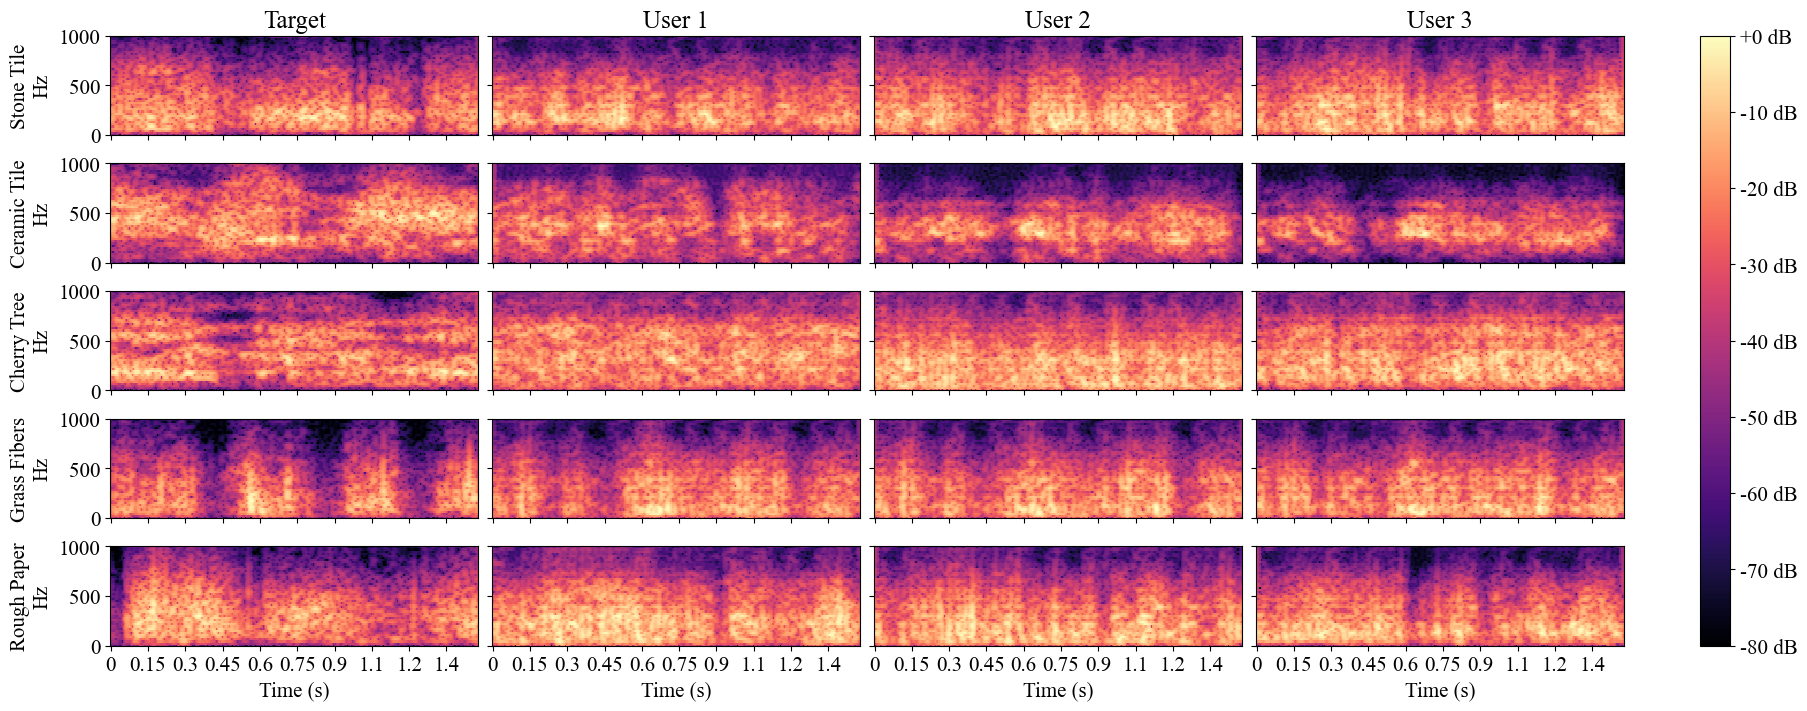

In [15]:
params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'normal',
        'font.size':15.
        }
plt.rcParams.update(params)
fig, ax = plt.subplots(5, 4, sharex=True, sharey=True, figsize=(18, 7), layout='compressed')

img = drawSpec('Reference_Waves/G2_2.wav', ax[0, 0])
ax[0, 0].set_title('Target')
ax[0, 0].set_ylabel('Stone Tile\nHz')
drawSpec('Generated_Waves/0118/G2_2_20240118183305.wav', ax[0, 1])
ax[0, 1].set_title('User 1')
drawSpec('Generated_Waves/0124/G2_2_20240124161123.wav', ax[0, 2])
ax[0, 2].set_title('User 2')
drawSpec('Generated_Waves/0321/G2_2_20240321153256.wav', ax[0, 3])
ax[0, 3].set_title('User 3')

drawSpec('Reference_Waves/G3_3.wav', ax[1, 0])
ax[1, 0].set_ylabel('Ceramic Tile\nHz')
drawSpec('Generated_Waves/0118/G3_3_20240119190843.wav', ax[1, 1])
drawSpec('Generated_Waves/0124/G3_3_20240124145902.wav', ax[1, 2])
drawSpec('Generated_Waves/0321/G3_3_20240321164617.wav', ax[1, 3])

drawSpec('Reference_Waves/G4_3.wav', ax[2, 0])
ax[2, 0].set_ylabel('Cherry Tree\nHz')
drawSpec('Generated_Waves/0118/G4_3_20240119192755.wav', ax[2, 1])
drawSpec('Generated_Waves/0124/G4_3_20240124153809.wav', ax[2, 2])
drawSpec('Generated_Waves/0321/G4_3_20240321172644.wav', ax[2, 3])

drawSpec('Reference_Waves/G6_3.wav', ax[3, 0])
ax[3, 0].set_ylabel('Grass Fibers\nHz')
drawSpec('Generated_Waves/0118/G6_3_20240120140447.wav', ax[3, 1])
drawSpec('Generated_Waves/0124/G6_3_20240124154515.wav', ax[3, 2])
drawSpec('Generated_Waves/0321/G6_3_20240321174512.wav', ax[3, 3])

drawSpec('Reference_Waves/G8_3.wav', ax[4, 0])
ax[4, 0].set_ylabel('Rough Paper\nHz')
ax[4, 0].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0118/G8_3_20240121165932.wav', ax[4, 1])
ax[4, 1].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0124/G8_3_20240124160430.wav', ax[4, 2])
ax[4, 2].set_xlabel('Time (s)')
drawSpec('Generated_Waves/0321/G8_3_20240321181028.wav', ax[4, 3])
ax[4, 3].set_xlabel('Time (s)')


plt.ylim(0, 1000)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("GenerationResults.png", dpi=300)


In [16]:
conf_matrix_g = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:8] == 'cm_cross':
        file = os.path.join(results_path, dir)
        conf_matrix_g += np.array(pd.read_csv(file, index_col=0))

conf_matrix_g = conf_matrix_g / sum(conf_matrix_g[0,:])

In [17]:
conf_matrix_r = np.zeros([5, 5], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:7] == 'cm_real':
        file = os.path.join(results_path, dir)
        conf_matrix_r += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_r = conf_matrix_r / sum(conf_matrix_r[0,:])

0.5761904761904761


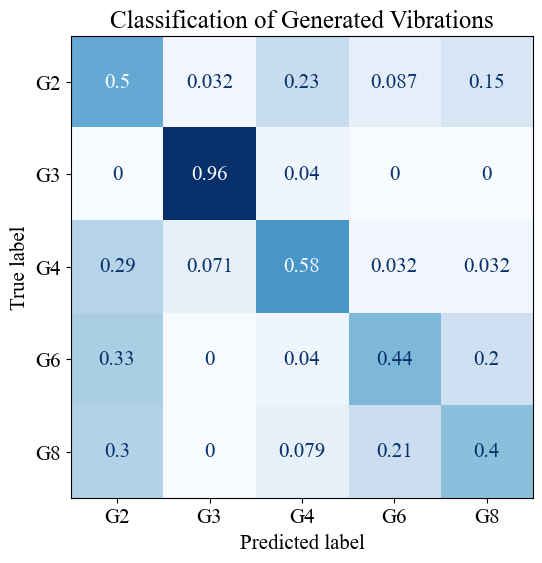

In [18]:
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_g).sum() / conf_matrix_g.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Classification of Generated Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    # values_format='d'
)

plt.savefig('ClassificationG.png', dpi = 300)

0.7253968253968255


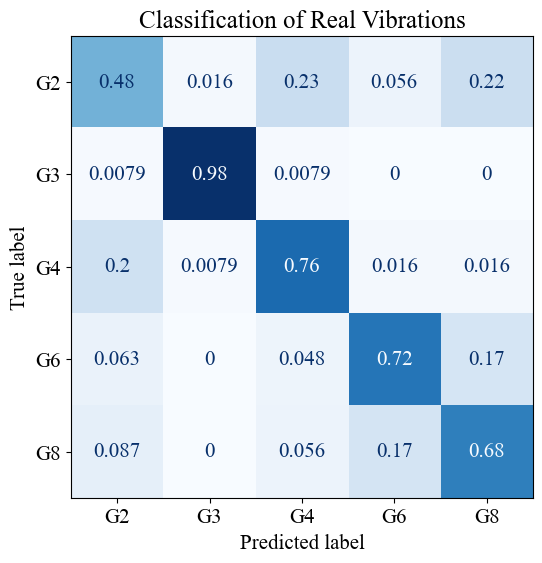

In [19]:
cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_r,
                            display_labels=['G2', 'G3', 'G4', 'G6', 'G8'])

print(np.diagonal(conf_matrix_r).sum() / conf_matrix_r.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Classification of Real Vibrations')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal",
    # values_format="d"
)

plt.savefig('ClassificationR.png', dpi = 300)

0.4603174603174603


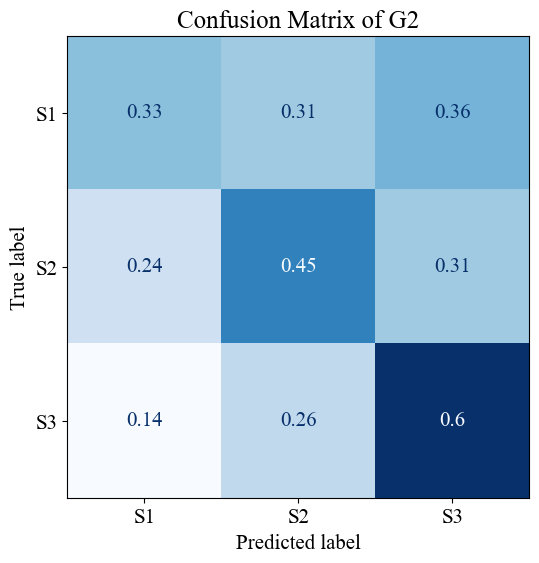

In [20]:
conf_matrix_g2 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G2':
        file = os.path.join(results_path, dir)
        conf_matrix_g2 += np.array(pd.read_csv(file, index_col=0))

conf_matrix_g2 = conf_matrix_g2 / sum(conf_matrix_g2[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g2,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g2).sum() / conf_matrix_g2.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G2')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.4761904761904761


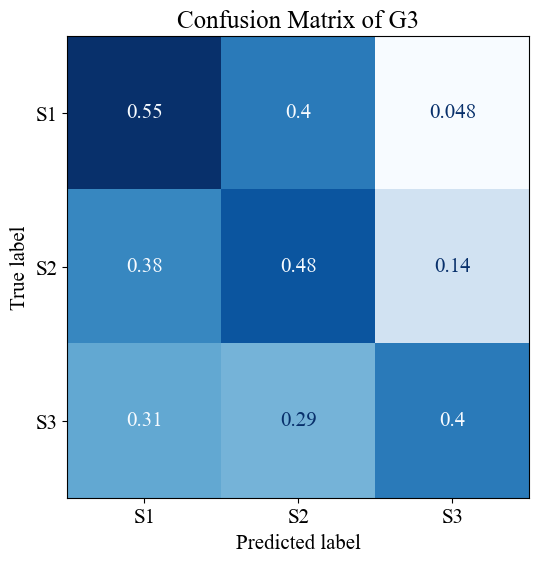

In [21]:
conf_matrix_g3 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G3':
        file = os.path.join(results_path, dir)
        conf_matrix_g3 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g3 = conf_matrix_g3 / sum(conf_matrix_g3[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g3,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g3).sum() / conf_matrix_g3.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G3')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.3888888888888889


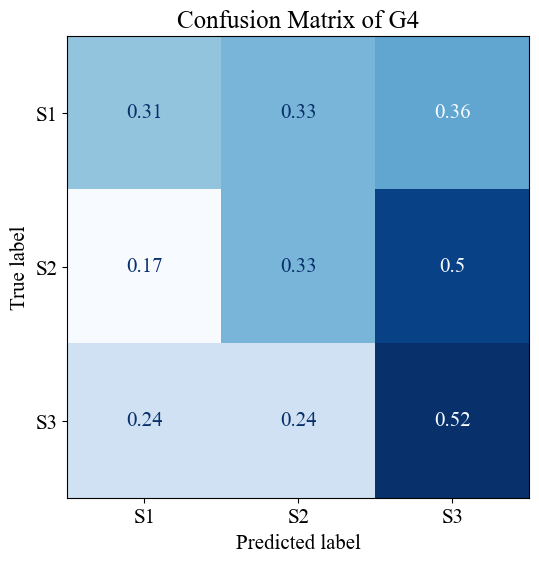

In [22]:
conf_matrix_g4 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G4':
        file = os.path.join(results_path, dir)
        conf_matrix_g4 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g4 = conf_matrix_g4 / sum(conf_matrix_g4[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g4,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g4).sum() / conf_matrix_g4.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G4')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.3888888888888889


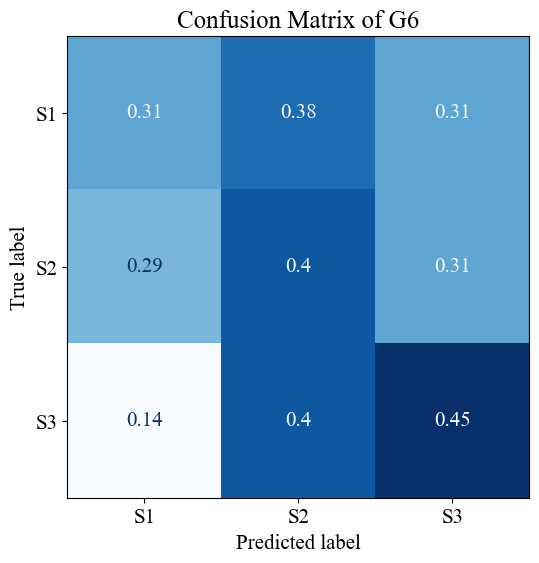

In [23]:
conf_matrix_g6 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G6':
        file = os.path.join(results_path, dir)
        conf_matrix_g6 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g6 = conf_matrix_g6 / sum(conf_matrix_g6[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g6,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g6).sum() / conf_matrix_g6.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G6')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)

0.4365079365079365


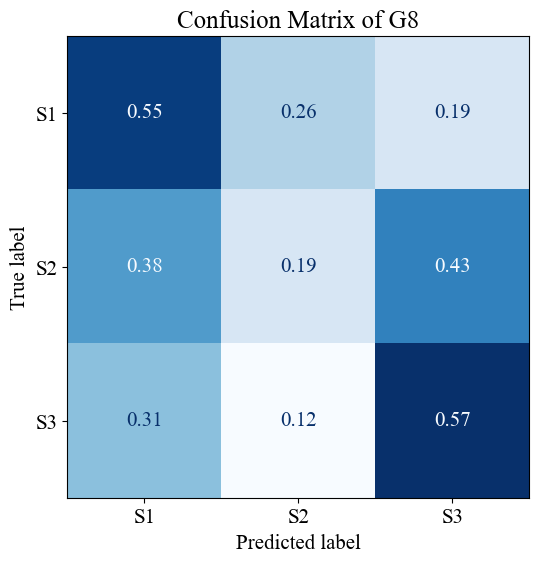

In [24]:
conf_matrix_g8 = np.zeros([3, 3], dtype=np.int64)
results_path = 'Evaluation_Results'
dir_list = os.listdir(results_path)
for dir in dir_list:
    if os.path.basename(dir)[0:13] == 'cm_inclass_G8':
        file = os.path.join(results_path, dir)
        conf_matrix_g8 += np.array(pd.read_csv(file, index_col=0))
        
conf_matrix_g8 = conf_matrix_g8 / sum(conf_matrix_g8[0,:])

cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_g8,
                            display_labels=['S1', 'S2', 'S3'])

print(np.diagonal(conf_matrix_g8).sum() / conf_matrix_g8.sum())

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Confusion Matrix of G8')

cm.plot(
    include_values=True,
    cmap="Blues",
    colorbar=False,
    ax=ax,
    xticks_rotation="horizontal"
)